In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import re
#from scipy.stats import f_oneway
import scipy.stats
from scipy.special import polygamma
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import dirichlet
import attila_utils

In [2]:
treatments_CO26990 = {
    'A': 'Saline WT',
    'B': 'Saline TG',
    'C': 'Amiloride TG',
}


fpath = '../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx'
data_CO26990 = pd.read_excel(fpath, sheet_name='rawdata MWM day 5', index_col='IRN')
data_CO26990['Condition'] = data_CO26990.Group.apply(lambda x: treatments_CO26990[x])
data_CO26990

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
12913 A,I,A,f,2,18.90810,60.31960,5.19308,15.57920,Saline WT
12915 A,I,A,f,2,25.56590,19.30760,28.09590,27.03060,Saline WT
12937 A,II,A,f,2,20.90550,50.19970,10.78560,18.10920,Saline WT
12955 A,II,A,f,1,20.10650,21.30490,33.28890,25.29960,Saline WT
12957 A,II,A,f,1,44.60720,16.24500,5.72570,33.42210,Saline WT
12961 A,II,A,f,5,11.85090,62.31690,9.45406,16.37820,Saline WT
12967 A,II,A,f,3,8.38881,37.01730,35.68580,18.90810,Saline WT
12979 A,II,A,f,4,15.57920,47.13720,30.49270,6.79095,Saline WT
14138,I,A,m,3,14.78030,44.20770,26.23170,14.78030,Saline WT


In [3]:
treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx'
data_CO28152 = pd.read_excel(fpath, sheet_name='raw data MWM day 5', index_col='IRN')
data_CO28152['Condition'] = data_CO28152.Group.apply(lambda x: treatments_CO28152[x])
data_CO28152

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
14627 A,I,A,f,1,0.00000,23.5686,63.11580,13.31560,Amiloride TG
14687 A,I,A,f,0,11.31820,24.2344,32.22370,32.22370,Amiloride TG
15117,I,A,f,0,28.76170,27.8296,18.37550,25.03330,Amiloride TG
15119,I,A,f,1,0.00000,15.0466,77.09720,7.85619,Amiloride TG
15121,I,A,f,7,2.26365,62.7164,11.71770,23.30230,Amiloride TG
...,...,...,...,...,...,...,...,...,...
16182,V,J,m,3,14.91340,61.9174,6.12517,16.77760,DMSO WT
16192,V,J,m,1,5.32623,21.4381,45.80560,27.43010,DMSO WT
16220,VI,J,m,4,18.10920,40.2130,16.24500,25.43280,DMSO WT


In [4]:
treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx'
data_CO28154 = pd.read_excel(fpath, sheet_name='Probe Trial day5', index_col='IRN')
data_CO28154['Condition'] = data_CO28154.Group.apply(lambda x: treatments_CO28154[x])
data_CO28154

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
15721,II,A,f,1,36.61780,19.5739,25.8322,17.97600,Saline TG
15725,II,A,f,4,4.39414,53.6618,27.8296,14.11450,Saline TG
15891,V,A,f,1,28.09590,22.5033,16.2450,33.15580,Saline TG
15893,V,A,f,1,18.50870,28.6285,26.2317,26.63120,Saline TG
15911,V,A,f,4,20.23970,21.9707,33.4221,24.36750,Saline TG
...,...,...,...,...,...,...,...,...,...
16774,III,L,m,8,8.78828,60.0533,19.9734,11.18510,Vehicle (Arundine) WT
16784,III,L,m,2,22.37020,40.0799,17.7097,19.84020,Vehicle (Arundine) WT
16802,IV,L,m,3,16.91080,40.3462,26.7643,15.97870,Vehicle (Arundine) WT


Male only datasets

In [5]:
data_CO26990_m, data_CO28152_m, data_CO28154_m = [df.loc[df['Sex'] == 'm'] for df in [data_CO26990, data_CO28152, data_CO28154]]

In [6]:
def extract_data4dirichlet(condition, data=data_CO26990, pseudo_time=0.1):
    a = data.loc[data.Condition == condition, 'SE (%)':'SW (%)'].to_numpy()[:, [1, 2, 3, 0]]
    a += pseudo_time
    return(a)

def my_dirichlet_plot(condition, do_test_uniform=True, data=data_CO26990):
    a = extract_data4dirichlet(condition, data=data)
    figname = 'named-figure/dirichlet-plot-' + re.sub('\W+', '-', condition) + '.png'
    print(figname)
    dirichlet.plot(a, label=condition, do_test_uniform=do_test_uniform, do_MWM_correction=True, verbose=True, save_figure=figname)

def study_plotter(data):
    for condition in data.Condition.unique():
        try:
            my_dirichlet_plot(condition, do_test_uniform=True, data=data)
        except:
            my_dirichlet_plot(condition, do_test_uniform=False, data=data)

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/46007162.py:8: SyntaxWarning: invalid escape sequence '\W'
  figname = 'named-figure/dirichlet-plot-' + re.sub('\W+', '-', condition) + '.png'


In [7]:
if False:
    study_plotter(data_CO26990)

In [8]:
#study_plotter(data_CO28152)

In [9]:
#study_plotter(data_CO28154)

In [10]:
def test_same_distro_one(test_cond, ref_cond='Saline TG', data=data_CO26990, study='CO26990', dataset='both sexes'):
    test_data, ref_data = [extract_data4dirichlet(c, data) for c in [test_cond, ref_cond]]
    data_list = [test_data, ref_data, np.concatenate([test_data, ref_data], axis=0)]
    n_list = [d.shape[0] for d in data_list]
    res = dirichlet.test_same_distribution(test_data, ref_data)
    res_unif = dirichlet.test_uniform(test_data)
    #D, p, a_mixed, a_test, a_ref = res
    columns = pd.MultiIndex.from_product([[study], [dataset], [test_cond]])
    df_LR = pd.DataFrame(np.array(res[:2]), index=pd.MultiIndex.from_product([['LR test'], ['D', 'p']]), columns=columns).transpose()
    df_LR_unif = pd.DataFrame(np.array(res_unif[:2]), index=pd.MultiIndex.from_product([['LR test uniform'], ['D', 'p']]), columns=columns).transpose()
    Z = zip([res[3], res[4], res[2]], [c + ' condition' for c in ['test', 'reference', 'mixed']], n_list)
    def helper(a, c, n):
        ix = pd.MultiIndex.from_product([[c], ['n', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']])
        amle = a
        a = np.array([n] + list(amle))
        val = pd.DataFrame(a, index=ix, columns=columns).transpose().astype({(c, 'n'): 'int64'})
        return(val)
    l = [helper(a, c, n) for a, c, n in Z]
    l = [df_LR] + [df_LR_unif] + l
    df = pd.concat(l, axis=1)
    return(df)


def test_same_distro(comparisons, data=data_CO26990, study='CO26990', dataset='both sexes'):
    test_conditions, ref_conditions = [comparisons[:, i] for i in [0, 1]]
    l = [test_same_distro_one(test_cond, ref_cond, data=data, study=study, dataset=dataset) for test_cond, ref_cond in zip(test_conditions, ref_conditions)]
    results = pd.concat(l, axis=0)
    Z = zip([study, dataset, test_conditions, ref_conditions], ['study', 'dataset', 'test condition', 'reference condition'])
    l = [pd.DataFrame(x, index=results.index, columns=pd.MultiIndex.from_product([['general'], [c]])) for x, c in Z]
    results = pd.concat(l + [results], axis=1)
    return(results)


#test_same_distro_one('Saline WT', 'Saline TG', data=data_CO26990)

comparisons_CO26990 = np.array([
    ['Saline TG', 'Saline TG'],
    ['Saline WT', 'Saline TG'],
    ['Amiloride TG', 'Saline TG'],
])

results_CO26990 = test_same_distro(comparisons_CO26990, data=data_CO26990, study='CO26990', dataset='both sexes')
results_CO26990_m = test_same_distro(comparisons_CO26990, data=data_CO26990_m, study='CO26990', dataset='males only')
results_CO26990


Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 3.95353
# p-value = 0.266526
# MLE params under null hypothesis (uniformity)           :[1.22772303 1.22772303 1.22772303 1.22772303]
# MLE params under alternative hypothesis                 :[1.5331693  1.46249262 1.42230579 0.95904141]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 14.3782
# p-value = 0.00243308
# MLE params under null hypothesis (uniformity)           :[2.04978545 2.04978545 2.04978545 2.04978545]
# MLE params under alternative hypothesis                 :[4.5717578  2.39881343 2.36860429 2.28969063]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 3.68916
# p-value = 0.297045
# MLE params under null hypothesis (uniformity)           :[1.8048442 1.8048442 1.8048442 1.8048442]
# MLE params under alternative hypothesis                 :[

general                             \
                                   study     dataset test condition   
CO26990 both sexes Saline TG     CO26990  both sexes      Saline TG   
                   Saline WT     CO26990  both sexes      Saline WT   
                   Amiloride TG  CO26990  both sexes   Amiloride TG   

                                                          LR test            \
                                reference condition             D         p   
CO26990 both sexes Saline TG              Saline TG -8.526513e-14  1.000000   
                   Saline WT              Saline TG  1.215595e+01  0.016228   
                   Amiloride TG           Saline TG  2.855241e+00  0.582335   

                                LR test uniform           test condition  \
                                              D         p              n   
CO26990 both sexes Saline TG           3.953530  0.266526             16   
                   Saline WT          14.378169  0.002433             15   
                   Amiloride TG        3.689156  0.297045             12   

                                           ... reference condition            \
                                  alpha_1  ...                   n   alpha_1   
CO26990 both sexes Saline TG     1.533169  ...                  16  1.533169   
                   Saline WT     4.571758  ...                  16  1.533169   
                   Amiloride TG  2.634961  ...                  16  1.533169   

                                                              mixed condition  \
                                  alpha_2   alpha_3   alpha_4               n   
CO26990 both sexes Saline TG     1.462493  1.422306  0.959041              32   
                   Saline WT     1.462493  1.422306  0.959041              31   
                   Amiloride TG  1.462493  1.422306  0.959041              28   

                                                                         
                                  alpha_1   alpha_2   alpha_3   alpha_4  
CO26990 both sexes Saline TG     1.533169  1.462493  1.422306  0.959041  
                   Saline WT     2.262327  1.664802  1.630875  1.288817  
                   Amiloride TG  1.866834  1.611917  1.570699  1.149556  

[3 rows x 23 columns]

In [11]:
comparisons_CO28152 = np.array([
    ['Saline TG', 'Saline TG'],
    ['Saline WT', 'Saline TG'],
    ['Amiloride TG', 'Saline TG'],
    ['HCQ TG', 'Saline TG'],
    ['HCQ nano TG', 'Saline TG'],
    ['R-HCQ TG', 'Saline TG'],
    ['S-HCQ TG', 'Saline TG'],
    ['TUDCA TG', 'Saline TG'],
    #['Saline WT', 'Saline WT'],
    ['TUDCA WT', 'Saline WT'],
    ['DMSO WT', 'Saline WT'],
])

results_CO28152 = test_same_distro(comparisons_CO28152, data=data_CO28152, study='CO28152', dataset='both sexes')
if False:
    # Fails to converge
    results_CO28152_m = test_same_distro(comparisons_CO28152, data=data_CO28152_m, study='CO28152', dataset='males only')
results_CO28152


Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 16.6122
# p-value = 0.000849118
# MLE params under null hypothesis (uniformity)           :[1.54945113 1.54945113 1.54945113 1.54945113]
# MLE params under alternative hypothesis                 :[3.26460961 2.70823708 1.73957974 1.35832802]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 13.3551
# p-value = 0.00392828
# MLE params under null hypothesis (uniformity)           :[1.91281696 1.91281696 1.91281696 1.91281696]
# MLE params under alternative hypothesis                 :[3.75516966 2.44485983 2.48949745 1.67142675]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 20.2777
# p-value = 0.000148667
# MLE params under null hypothesis (uniformity)           :[0.69213269 0.69213269 0.69213269 0.69213269]
# MLE params under alternative hypothesis         

general                             \
                                   study     dataset test condition   
CO28152 both sexes Saline TG     CO28152  both sexes      Saline TG   
                   Saline WT     CO28152  both sexes      Saline WT   
                   Amiloride TG  CO28152  both sexes   Amiloride TG   
                   HCQ TG        CO28152  both sexes         HCQ TG   
                   HCQ nano TG   CO28152  both sexes    HCQ nano TG   
                   R-HCQ TG      CO28152  both sexes       R-HCQ TG   
                   S-HCQ TG      CO28152  both sexes       S-HCQ TG   
                   TUDCA TG      CO28152  both sexes       TUDCA TG   
                   TUDCA WT      CO28152  both sexes       TUDCA WT   
                   DMSO WT       CO28152  both sexes        DMSO WT   

                                                          LR test            \
                                reference condition             D         p   
CO28152 both sexes Saline TG              Saline TG -3.853984e-10  1.000000   
                   Saline WT              Saline TG  2.872610e+00  0.579365   
                   Amiloride TG           Saline TG  1.107565e+01  0.025727   
                   HCQ TG                 Saline TG  4.338245e+00  0.362161   
                   HCQ nano TG            Saline TG  3.155791e+00  0.532101   
                   R-HCQ TG               Saline TG  1.877268e+01  0.000871   
                   S-HCQ TG               Saline TG  1.236203e+01  0.014853   
                   TUDCA TG               Saline TG  8.879725e-01  0.926280   
                   TUDCA WT               Saline WT  6.657759e+00  0.155118   
                   DMSO WT                Saline WT  7.432604e-01  0.945889   

                                LR test uniform           test condition  \
                                              D         p              n   
CO28152 both sexes Saline TG          16.612213  0.000849             16   
                   Saline WT          13.355138  0.003928             16   
                   Amiloride TG       20.277732  0.000149             12   
                   HCQ TG             20.848218  0.000113             16   
                   HCQ nano TG        12.662144  0.005427             16   
                   R-HCQ TG            9.316800  0.025362              9   
                   S-HCQ TG           13.306280  0.004019             13   
                   TUDCA TG           12.188681  0.006764             16   
                   TUDCA WT           24.245602  0.000022             15   
                   DMSO WT            10.797344  0.012874             16   

                                           ... reference condition           \
                                  alpha_1  ...                   n  alpha_1   
CO28152 both sexes Saline TG     3.264610  ...                  16  3.26461   
                   Saline WT     3.755170  ...                  16  3.26461   
                   Amiloride TG  1.746332  ...                  16  3.26461   
                   HCQ TG        4.659832  ...                  16  3.26461   
                   HCQ nano TG   2.756600  ...                  16  3.26461   
                   R-HCQ TG      9.771260  ...                  16  3.26461   
                   S-HCQ TG      7.684142  ...                  16  3.26461   
                   TUDCA TG      2.523713  ...                  16  3.26461   
                   TUDCA WT      6.717859  ...                  16  3.75517   
                   DMSO WT       4.200465  ...                  16  3.75517   

                                                              mixed condition  \
                                  alpha_2   alpha_3   alpha_4               n   
CO28152 both sexes Saline TG     2.708237  1.739580  1.358328              32   
                   Saline WT     2.708237  1.739580  1.358328              32   
                   Amiloride TG  2.708237  1.

In [12]:
comparisons_CO28154 = np.array([
    ['Saline TG', 'Saline TG'],
    ['Saline WT', 'Saline TG'],
    ['TUDCA + HCQ TG', 'Saline TG'],
    ['Vehicle (Arundine) TG', 'Vehicle (Arundine) TG'],
    ['Arundine low dose TG', 'Vehicle (Arundine) TG'],
    ['Arundine mid dose TG', 'Vehicle (Arundine) TG'],
    ['Arundine high dose TG', 'Vehicle (Arundine) TG'],
    #['Saline WT', 'Saline WT'],
    ['TUDCA + HCQ WT', 'Saline WT'],
    ['Vehicle (Arundine) WT', 'Vehicle (Arundine) WT'],
    ['Arundine high dose WT', 'Vehicle (Arundine) WT'],
])

results_CO28154 = test_same_distro(comparisons_CO28154, data=data_CO28154, study='CO28154', dataset='both sexes')
results_CO28154_m = test_same_distro(comparisons_CO28154, data=data_CO28154_m, study='CO28154', dataset='males only')
results_CO28154


Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 19.3693
# p-value = 0.000229301
# MLE params under null hypothesis (uniformity)           :[2.61445932 2.61445932 2.61445932 2.61445932]
# MLE params under alternative hypothesis                 :[6.07356766 4.60731264 3.08143155 2.8750881 ]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 29.3827
# p-value = 1.86084e-06
# MLE params under null hypothesis (uniformity)           :[2.27684923 2.27684923 2.27684923 2.27684923]
# MLE params under alternative hypothesis                 :[7.48306533 4.02937634 3.16485208 2.96577609]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 45.5376
# p-value = 7.11211e-10
# MLE params under null hypothesis (uniformity)           :[1.3524912 1.3524912 1.3524912 1.3524912]
# MLE params under alternative hypothesis            

general              \
                                            study     dataset   
CO28154 both sexes Saline TG              CO28154  both sexes   
                   Saline WT              CO28154  both sexes   
                   TUDCA + HCQ TG         CO28154  both sexes   
                   Vehicle (Arundine) TG  CO28154  both sexes   
                   Arundine low dose TG   CO28154  both sexes   
                   Arundine mid dose TG   CO28154  both sexes   
                   Arundine high dose TG  CO28154  both sexes   
                   TUDCA + HCQ WT         CO28154  both sexes   
                   Vehicle (Arundine) WT  CO28154  both sexes   
                   Arundine high dose WT  CO28154  both sexes   

                                                                 \
                                                 test condition   
CO28154 both sexes Saline TG                          Saline TG   
                   Saline WT                          Saline WT   
                   TUDCA + HCQ TG                TUDCA + HCQ TG   
                   Vehicle (Arundine) TG  Vehicle (Arundine) TG   
                   Arundine low dose TG    Arundine low dose TG   
                   Arundine mid dose TG    Arundine mid dose TG   
                   Arundine high dose TG  Arundine high dose TG   
                   TUDCA + HCQ WT                TUDCA + HCQ WT   
                   Vehicle (Arundine) WT  Vehicle (Arundine) WT   
                   Arundine high dose WT  Arundine high dose WT   

                                                                      LR test  \
                                            reference condition             D   
CO28154 both sexes Saline TG                          Saline TG -1.989520e-13   
                   Saline WT                          Saline TG  2.663898e+00   
                   TUDCA + HCQ TG                     Saline TG  9.912195e+00   
                   Vehicle (Arundine) TG  Vehicle (Arundine) TG  0.000000e+00   
                   Arundine low dose TG   Vehicle (Arundine) TG  1.466524e+01   
                   Arundine mid dose TG   Vehicle (Arundine) TG  1.086360e+01   
                   Arundine high dose TG  Vehicle (Arundine) TG  8.954800e+00   
                   TUDCA + HCQ WT                     Saline WT  3.207020e+00   
                   Vehicle (Arundine) WT  Vehicle (Arundine) WT  0.000000e+00   
                   Arundine high dose WT  Vehicle (Arundine) WT  3.936443e+00   

                                                   LR test uniform  \
                                                 p               D   
CO28154 both sexes Saline TG              1.000000       19.369293   
                   Saline WT              0.615547       29.382674   
                   TUDCA + HCQ TG         0.041933       45.537615   
                   Vehicle (Arundine) TG  1.000000       18.146774   
                   Arundine low dose TG   0.005448       13.673979   
                   Arundine mid dose TG   0.028141       14.253921   
                   Arundine high dose TG  0.062239       26.346479   
                   TUDCA + HCQ WT         0.523798       34.627613   
                   Vehicle (Arundine) WT  1.000000       43.140266   
                   Arundine high dose WT  0.414676       29.817041   

                                                       test condition  \
                                                     p              n   
CO28154 both sexes Saline TG              2.293012e-04             15   
                   Saline WT              1.860844e-06             16   
                   TUDCA + HCQ TG         7.112115e-10             18   
                   Vehicle (Arundine) TG  4.102301e-04             16   
                   Arundine low dose TG   3.384246e-03             16   
                   Arundine mid dose TG   2.579127e-03             16   
                   Arundine high dose TG  8.069936e-06    

In [13]:
l_results = [results_CO26990, results_CO28152, results_CO28154, results_CO26990_m, results_CO28154_m]
results = pd.concat(l_results, axis=0)
results.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-results.csv')

In [14]:
def alpha2fraction(res=results_CO26990):
    conditions = ['test condition', 'reference condition', 'mixed condition']
    def helper(c):
        df = res.xs(c, level=0, axis=1).drop('n', axis=1)
        df = df.apply(lambda r: r / df.sum(axis=1), axis=0)
        columns = pd.MultiIndex.from_product([[c], ['frac_' + str(int(i)) for i in np.arange(4) + 1]])
        df = pd.DataFrame(df.to_numpy(), index=df.index, columns=columns)
        return(df)
    l = [helper(c) for c in conditions]
    val = pd.concat(l, axis=1)
    return(val)

l_fractions = [alpha2fraction(r) for r in l_results]
fractions = pd.concat(l_fractions, axis=0)
fractions.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-fractions.csv')
fractions

test condition                      \
                                                 frac_1    frac_2    frac_3   
CO26990 both sexes Saline TG                   0.285134  0.271990  0.264516   
                   Saline WT                   0.393139  0.206281  0.203683   
                   Amiloride TG                0.325556  0.242072  0.236483   
CO28152 both sexes Saline TG                   0.359905  0.298568  0.191779   
                   Saline WT                   0.362435  0.235969  0.240277   
                   Amiloride TG                0.334362  0.324252  0.260524   
                   HCQ TG                      0.425611  0.213068  0.194236   
                   HCQ nano TG                 0.316713  0.269736  0.270454   
                   R-HCQ TG                    0.285507  0.272740  0.268686   
                   S-HCQ TG                    0.336523  0.259408  0.226072   
                   TUDCA TG                    0.349897  0.286568  0.211208   
                   TUDCA WT                    0.398487  0.257130  0.166254   
                   DMSO WT                     0.343097  0.236991  0.243469   
CO28154 both sexes Saline TG                   0.365055  0.276925  0.185211   
                   Saline WT                   0.424136  0.228383  0.179382   
                   TUDCA + HCQ TG              0.488306  0.240701  0.144341   
                   Vehicle (Arundine) TG       0.367598  0.247066  0.190531   
                   Arundine low dose TG        0.414041  0.205786  0.203968   
                   Arundine mid dose TG        0.373909  0.261611  0.213312   
                   Arundine high dose TG       0.376403  0.288130  0.214362   
                   TUDCA + HCQ WT              0.458653  0.231172  0.162159   
                   Vehicle (Arundine) WT       0.456554  0.235823  0.146301   
                   Arundine high dose WT       0.427290  0.198720  0.182858   
CO26990 males only Saline TG                   0.244382  0.255164  0.306660   
                   Saline WT                   0.412720  0.227494  0.186677   
                   Amiloride TG                0.327261  0.215918  0.245779   
CO28154 males only Saline TG                   0.413637  0.253921  0.171383   
                   Saline WT                   0.431145  0.236103  0.195385   
                   TUDCA + HCQ TG              0.488306  0.240701  0.144341   
                   Vehicle (Arundine) TG       0.433626  0.229796  0.142113   
                   Arundine low dose TG        0.514718  0.168326  0.164069   
                   Arundine mid dose TG        0.514443  0.221625  0.154988   
                   Arundine high dose TG       0.490586  0.282597  0.127691   
                   TUDCA + HCQ WT              0.458653  0.231172  0.162159   
                   Vehicle (Arundine) WT       0.488759  0.234373  0.126688   
                   Arundine high dose WT       0.504155  0.224440  0.143116   

                                                   reference condition  \
                                            frac_4              frac_1   
CO26990 both sexes Saline TG              0.178360            0.285134   
                   Saline WT              0.196897            0.285134   
                   Amiloride TG           0.195889            0.285134   
CO28152 both sexes Saline TG              0.149748            0.359905   
                   Saline WT              0.161320            0.359905   
                   Amiloride TG           0.080863            0.359905   
                   HCQ TG                 0.167085            0.359905   
                   HCQ nano TG            0.143097            0.359905   
                   R-HCQ TG               0.173067            0.359905   
                   S-HCQ TG               0.177998            0.359905   
                   TUDCA TG               0.152327            0.359905   
                   TUDCA WT               0.178129            0.362435   
  

In [15]:
def alpha2stdev(res=results_CO26990, get_variance=False):
    conditions = ['test condition', 'reference condition', 'mixed condition']
    def helper(c):
        def get_sdev(r, i):
            amle = r.drop('n').to_numpy()
            n = r.loc['n']
            vararray = 1. / ((polygamma(1, amle) - polygamma(1, amle.sum())) * n)
            yerr = np.sqrt(vararray) / np.sum(amle)
            a = vararray if get_variance else yerr
            val = a[i]
            #val = pd.DataFrame(a, index=['1', '2', '3', '4'], columns=r.index).transpose()
            return(val)
        df = res.xs(c, level=0, axis=1)
        l = [df.apply(lambda r: get_sdev(r, i), axis=1) for i in range(4)]
        df = pd.concat(l, axis=1)
        df.columns = pd.MultiIndex.from_product([[c], ['err_' + str(int(i)) for i in np.arange(4) + 1]])
        return(df)
    l = [helper(c) for c in conditions]
    val = pd.concat(l, axis=1)
    return(val)

stdeviations, variances = [pd.concat([alpha2stdev(r, get_variance=b) for r in l_results], axis=0) for b in [False, True]]
stdeviations.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-stdeviations.csv')
variances.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-variances.csv')
stdeviations

test condition                      \
                                                  err_1     err_2     err_3   
CO26990 both sexes Saline TG                   0.055424  0.053242  0.052002   
                   Saline WT                   0.056471  0.034032  0.033717   
                   Amiloride TG                0.062191  0.048977  0.048088   
CO28152 both sexes Saline TG                   0.056096  0.048047  0.034095   
                   Saline WT                   0.053483  0.038037  0.038562   
                   Amiloride TG                0.074177  0.072190  0.059783   
                   HCQ TG                      0.060251  0.034517  0.032234   
                   HCQ nano TG                 0.051211  0.045002  0.045097   
                   R-HCQ TG                    0.034850  0.033721  0.033363   
                   S-HCQ TG                    0.039574  0.032567  0.029554   
                   TUDCA TG                    0.059785  0.050545  0.039574   
                   TUDCA WT                    0.048585  0.034401  0.025291   
                   DMSO WT                     0.047666  0.035785  0.036510   
CO28154 both sexes Saline TG                   0.045372  0.036544  0.027399   
                   Saline WT                   0.048704  0.029995  0.025338   
                   TUDCA + HCQ TG              0.058745  0.032576  0.022591   
                   Vehicle (Arundine) TG       0.042385  0.031266  0.026044   
                   Arundine low dose TG        0.070404  0.039149  0.038874   
                   Arundine mid dose TG        0.060489  0.044989  0.038345   
                   Arundine high dose TG       0.051486  0.041462  0.033218   
                   TUDCA + HCQ WT              0.057713  0.032920  0.025451   
                   Vehicle (Arundine) WT       0.047451  0.028080  0.020300   
                   Arundine high dose WT       0.046457  0.025943  0.024516   
CO26990 males only Saline TG                   0.074212  0.077094  0.090846   
                   Saline WT                   0.084565  0.052559  0.045494   
                   Amiloride TG                0.096155  0.068190  0.075743   
CO28154 males only Saline TG                   0.073421  0.049852  0.037775   
                   Saline WT                   0.087495  0.054072  0.047209   
                   TUDCA + HCQ TG              0.058745  0.032576  0.022591   
                   Vehicle (Arundine) TG       0.049182  0.030395  0.022349   
                   Arundine low dose TG        0.152778  0.056896  0.055708   
                   Arundine mid dose TG        0.125427  0.060833  0.046477   
                   Arundine high dose TG       0.097965  0.061108  0.034685   
                   TUDCA + HCQ WT              0.057713  0.032920  0.025451   
                   Vehicle (Arundine) WT       0.061038  0.034074  0.022939   
                   Arundine high dose WT       0.061447  0.032315  0.024189   

                                                   reference condition  \
                                             err_4               err_1   
CO26990 both sexes Saline TG              0.037408            0.055424   
                   Saline WT              0.032890            0.055424   
                   Amiloride TG           0.041538            0.055424   
CO28152 both sexes Saline TG              0.028252            0.056096   
                   Saline WT              0.028645            0.056096   
                   Amiloride TG           0.021849            0.056096   
                   HCQ TG                 0.028854            0.056096   
                   HCQ nano TG            0.027618            0.056096   
                   R-HCQ TG               0.024800            0.056096   
                   S-HCQ TG               0.025110            0.056096   
                   TUDCA TG               0.030552            0.056096   
                   TUDCA WT               0.026526            0.053483   
  

In [16]:
def fraction2entropy(frac):
    conditions = frac.columns.get_level_values(0).unique()
    def helper(c):
        df = frac.xs(c, level=0, axis=1)
        entropy = df.apply(scipy.stats.dirichlet.entropy, axis=1).to_frame(c)
        return(entropy)
    l = [helper(c) for c in conditions]
    val = pd.concat(l, axis=1)
    return(val)
        
entropies = pd.concat([fraction2entropy(f) for f in l_fractions], axis=0)
entropies['information gain'] = entropies['reference condition'] - entropies['test condition']
entropies['information gain uniform'] = scipy.stats.dirichlet.entropy(np.ones(4) / 4) - entropies['test condition']
entropies.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-entropies.csv')
entropies

test condition  reference condition  \
CO26990 both sexes Saline TG                   -6.312079            -6.312079   
                   Saline WT                   -7.023390            -6.312079   
                   Amiloride TG                -6.276764            -6.312079   
CO28152 both sexes Saline TG                   -7.613508            -7.613508   
                   Saline WT                   -7.014572            -7.613508   
                   Amiloride TG               -11.590788            -7.613508   
                   HCQ TG                      -7.734905            -7.613508   
                   HCQ nano TG                 -7.201482            -7.613508   
                   R-HCQ TG                    -6.400899            -7.613508   
                   S-HCQ TG                    -6.574861            -7.613508   
                   TUDCA TG                    -7.278899            -7.613508   
                   TUDCA WT                    -7.609499            -7.014572   
                   DMSO WT                     -6.611249            -7.014572   
CO28154 both sexes Saline TG                   -7.172583            -7.172583   
                   Saline WT                   -7.811523            -7.172583   
                   TUDCA + HCQ TG             -10.311931            -7.172583   
                   Vehicle (Arundine) TG       -6.822452            -6.822452   
                   Arundine low dose TG        -7.445112            -6.822452   
                   Arundine mid dose TG        -7.413518            -6.822452   
                   Arundine high dose TG       -8.559987            -6.822452   
                   TUDCA + HCQ WT              -8.862336            -7.811523   
                   Vehicle (Arundine) WT       -8.896392            -8.896392   
                   Arundine high dose WT       -7.639803            -8.896392   
CO26990 males only Saline TG                   -6.185068            -6.185068   
                   Saline WT                   -7.536260            -6.185068   
                   Amiloride TG                -6.238312            -6.185068   
CO28154 males only Saline TG                   -7.942814            -7.942814   
                   Saline WT                   -8.444470            -7.942814   
                   TUDCA + HCQ TG             -10.311931            -7.942814   
                   Vehicle (Arundine) TG       -8.336329            -8.336329   
                   Arundine low dose TG        -9.823924            -8.336329   
                   Arundine mid dose TG       -11.278543            -8.336329   
                   Arundine high dose TG      -12.596323            -8.336329   
                   TUDCA + HCQ WT              -8.862336            -8.444470   
                   Vehicle (Arundine) WT      -10.163680           -10.163680   
                   Arundine high dose WT      -10.480609           -10.163680   

                                          mixed condition  information gain  \
CO26990 both sexes Saline TG                    -6.312079          0.000000   
                   Saline WT                    -6.378774          0.711311   
                   Amiloride TG                 -6.252004         -0.035315   
CO28152 both sexes Saline TG                    -7.613510          0.000000   
                   Saline WT                    -7.197325         -0.598936   
                   Amiloride TG                 -9.036091          3.977280   
                   HCQ TG                       -7.496697          0.121397   
                   HCQ nano TG                  -7.243684         -0.412026   
                   R-HCQ TG                     -7.038645         -1.212610   
                   S-HCQ TG                     -7.104295         -1.038647   
                   TUDCA TG                     -7.428619         -0.334609   
                   TUDCA WT                     -7.124821          0.594927   
                 

In [17]:
l_all, l_all_m = [[df.xs(dataset, level=1, axis=0) for df in [results, fractions, stdeviations, entropies]] for dataset in ['both sexes', 'males only']]
#l_all = [df.xs('both sexes', level=1, axis=0) for df in [results, fractions, stdeviations, entropies]]
#l_all = [results, fractions, stdeviations, entropies]
#l_all_b, l_all_m = [[df.xs(d, level=1, axis=0) for df in l_all] for d in ['both sexes', 'males only']]
d_sel = {
    'CO26990': ['Amiloride TG', 'Saline WT'],
    'CO28154': ['TUDCA + HCQ TG	', 'Arundine low dose TG', 'Saline WT'],
}


In [18]:
def info_plot(axi, entropies):
    data = entropies.copy()
    data.loc[:, 'treatment'] = data.index
    def helper(axi, x, markerfacecolor):
        axi = sns.pointplot(data=data, y='treatment', x=x, ax=axi, linestyles='none', markeredgewidth=0.5, markeredgecolor='k', markerfacecolor=markerfacecolor)
        return(axi)
    axi = helper(axi, 'information gain', 'gray')
    axi = helper(axi, 'information gain uniform', 'white')
    axi.axvline(0, color='k', linewidth=1, linestyle='--')
    axi.set_title('Information gain')
    axi.set_xlabel(r'$-\Delta$ entropy: $H_\mathrm{ref} - H_\mathrm{test}$')
    return(axi)


def frac_plot(axi, fractions, stdeviations):
    cumfrac = fractions.xs('test condition', level=0, axis=1).cumsum(axis=1).copy()
    stdev = stdeviations.xs('test condition', level=0, axis=1).copy()
    cumfrac.loc[:, 'treatment'] = cumfrac.index
    for i in list(range(cumfrac.shape[1]))[3::-1]:
        axi = sns.barplot(data=cumfrac, y='treatment', x=cumfrac.columns[i], ax=axi)
        x = cumfrac.columns[i]
        xerr = stdev.loc[:, x.replace('frac', 'err')]
        y = np.arange(len(cumfrac[x]))
        def my_errorbar(x, xerr):
            axi.errorbar(y=y, x=x, xerr=xerr, color='k', linestyle='none', capsize=4, linewidth=0.5)
        my_errorbar(cumfrac.loc[:, x], xerr)
    my_errorbar(np.zeros_like(y), stdev.loc[:, 'err_4'])
    axi.set_xlabel('fraction of time')
    axi.set_xlim(0, 1)
    axi.set_title('ML estimate')
    return(axi)


def pval_plot(axi, results):
    def helper(axi, test_type='LR test', markerfacecolor='gray'):
        data = results.xs(test_type, level=0, axis=1).copy()
        data.loc[:, 'treatment'] = data.index
        axi = sns.pointplot(data=data, y='treatment', x='p', ax=axi, linestyles='none', markeredgewidth=0.5, markeredgecolor='k', markerfacecolor=markerfacecolor)
        return(axi)
    axi = helper(axi, 'LR test', 'gray')
    axi = helper(axi, 'LR test uniform', 'white')
    axi.set_xscale('log')
    axi.set_xlabel(r'$p$-value')
    axi.set_title('Likelihood ratio test')
    for alpha in [1e-3, 1e-2, 5e-2]:
        axi.axvline(alpha, color='k', linewidth=1, linestyle='--')
    return(axi)


def quadrant_legend(fig, bbox_x=0.05, bbox_y=None, loc='lower left'):
    handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]
    labels = ['target', 'adjacent 1', 'adjacent 2', 'opposite']
    #bbox_y = 1 if bbox_y is None else bbox_y
    fig.legend(handles=handles, labels=labels, loc=loc, bbox_to_anchor=(bbox_x, bbox_y), title='Quadrants:')


def plot_all(l_all, d_sel=None, info_xlims=None, p_xlims=None, hspace_denom=None, bbox_y=None, ref_treatment=None):
    d_plot = {'fractions': frac_plot, 'information': info_plot, 'p-value': pval_plot}
    if d_sel is None:
        df = l_all[0]
        d_sel = {s: df.xs(s, level=0, axis=0).index.to_list() for s in df.index.get_level_values(0).unique()}
    height_ratios = [len(v) for v in d_sel.values()]
    width_ratios = [2, 2, 3]
    hspace_denom = 40 if hspace_denom is None else hspace_denom
    gridspec_kw = {'left': 0.05, 'right': 0.48, 'hspace': sum(height_ratios) / hspace_denom}
    figsize = (12.8, sum(height_ratios) / 3)
    fig, ax = plt.subplots(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios,
                           figsize=figsize, gridspec_kw=gridspec_kw, squeeze=False)
    mins = [0, 0, 1]
    maxs = [1, 0, 1e-6]
    for i, items in enumerate(d_sel.items()):
        study, l_exper = items
        results, fractions, stdeviations, entropies = [df.xs(study, level=0, axis=0).loc[l_exper] for df in l_all]
        d_args = {'fractions': (fractions, stdeviations), 'information': (entropies,), 'p-value': (results,)}
        for j, plot_type in enumerate(['fractions', 'information', 'p-value']):
            axi = ax[i, j]
            plotter = d_plot[plot_type]
            args = d_args[plot_type]
            axi = plotter(axi, *args)
            axi.set_ylabel('')
            axi.grid(axis='y', linestyle='dotted')
            if info_xlims is not None and plot_type == 'information':
                axi.set_xlim(info_xlims)
            if p_xlims is not None and plot_type == 'p-value':
                axi.set_xlim(p_xlims)
            if j > 0:
                axi.set_ylabel('')
                axi.set_yticklabels([])
            if i < len(d_sel) - 1:
                axi.set_xlabel('')
            if i > 0:
                axi.set_title('')
    bbox_y = 1 if bbox_y is None else bbox_y
    legend = quadrant_legend(fig, bbox_y=bbox_y)
    handles1 = [mlines.Line2D([], [], linestyle='none', markeredgewidth=0.5, marker='o', markerfacecolor=c, markeredgecolor='k') for c in ['gray', 'white']]
    ref_treatment = 'ref. treatment' if ref_treatment is None else ref_treatment
    labels1 = ['trained control (' + ref_treatment + ')', 'untrained control (uniform dist.)']
    title1 = r'$H_0$, reference condition'
    fig.legend(handles=handles1, labels=labels1, loc='lower left', bbox_to_anchor=(0.225, bbox_y), title=title1)
    return((fig, ax))


if False:
    fig, ax = plot_all(l_all, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=60, bbox_y=0.95)
    attila_utils.savefig(fig, 'plotall-all')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/64440166.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-CO26990-CO28152.png',
 'named-figure/plotall-CO26990-CO28152.pdf']

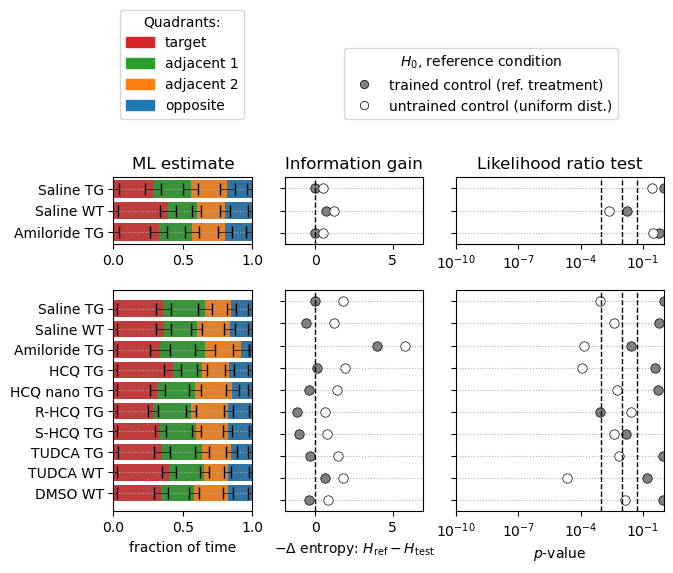

In [19]:
d_sel = {
    'CO26990': results.xs('CO26990').xs('both sexes').index.to_list(),
    'CO28152': results.xs('CO28152').xs('both sexes').index.to_list(),
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=40)
attila_utils.savefig(fig, 'plotall-CO26990-CO28152')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/64440166.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-CO28154.png', 'named-figure/plotall-CO28154.pdf']

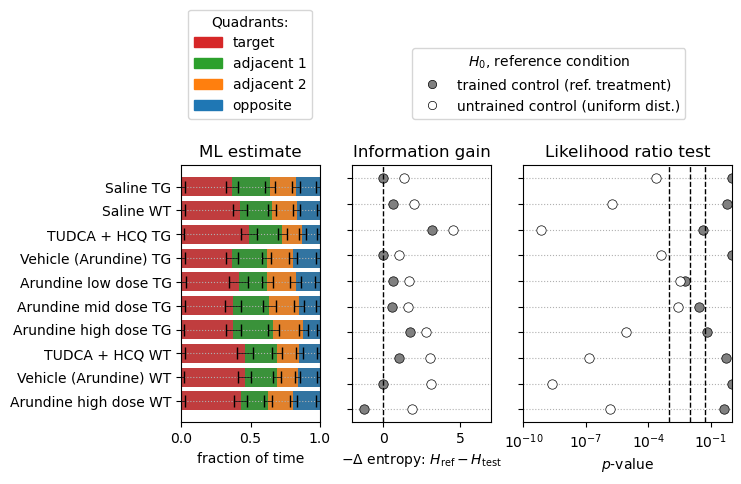

In [20]:
d_sel = {
    'CO28154': results.xs('CO28154').xs('both sexes').index.to_list(),
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1))
attila_utils.savefig(fig, 'plotall-CO28154')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/64440166.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-CO28154_m.png', 'named-figure/plotall-CO28154_m.pdf']

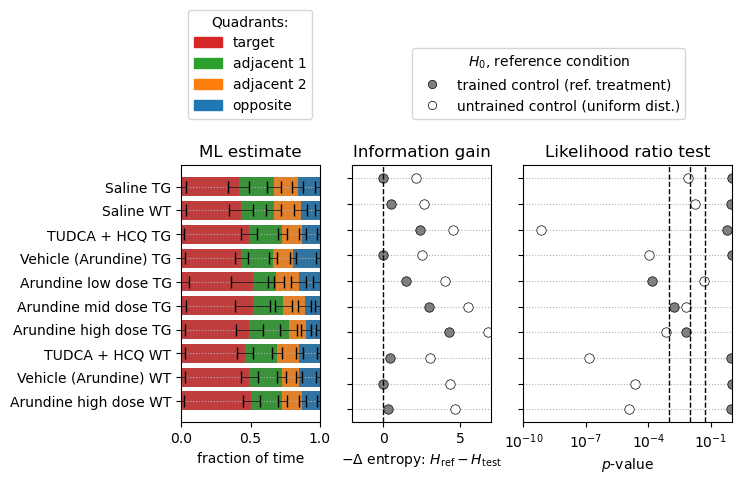

In [21]:
d_sel = {
    'CO28154': results.xs('CO28154').xs('males only').index.to_list(),
}

fig, ax = plot_all(l_all_m, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1))
attila_utils.savefig(fig, 'plotall-CO28154_m')

In [22]:
d_sel = {
    'CO28154': ['Vehicle (Arundine) TG', 'Vehicle (Arundine) WT', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG'],
}

if False:
    fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Vehicle (Arundine) TG', bbox_y=1.05)
    attila_utils.savefig(fig, 'plotall-arundine')

In [23]:
d_sel = {
    'CO28154': ['Vehicle (Arundine) WT', 'Arundine high dose WT'],
}

if False:
    fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Vehicle (Arundine) WT', bbox_y=1.3)
    attila_utils.savefig(fig, 'plotall-arundine-wt')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/64440166.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-TUDCA-HCQ.png', 'named-figure/plotall-TUDCA-HCQ.pdf']

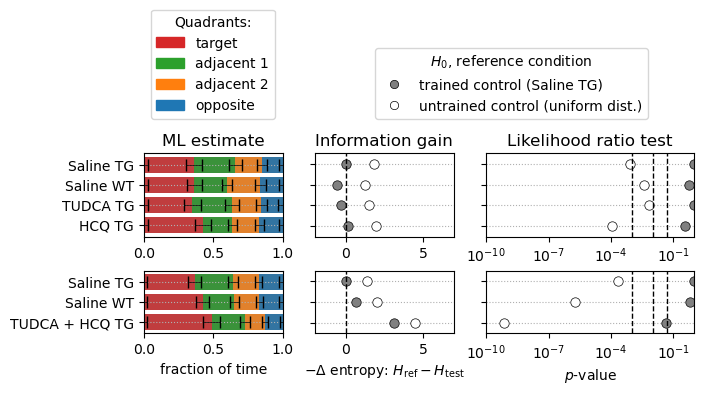

In [24]:
d_sel = {
    'CO28152': ['Saline TG', 'Saline WT', 'TUDCA TG', 'HCQ TG'],
    'CO28154': ['Saline TG', 'Saline WT', 'TUDCA + HCQ TG'],
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Saline TG')
attila_utils.savefig(fig, 'plotall-TUDCA-HCQ')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/64440166.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-TUDCA-HCQ_m.png',
 'named-figure/plotall-TUDCA-HCQ_m.pdf']

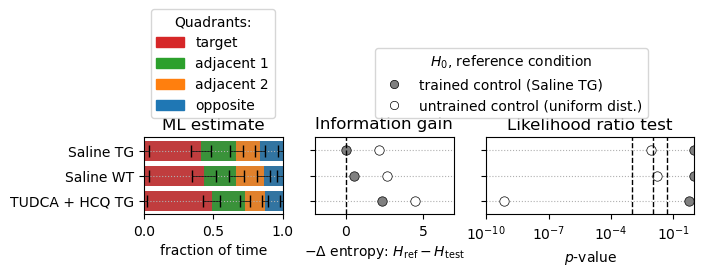

In [25]:
d_sel = {
    #'CO28152': ['Saline TG', 'Saline WT', 'TUDCA TG', 'HCQ TG'],
    'CO28154': ['Saline TG', 'Saline WT', 'TUDCA + HCQ TG'],
}

fig, ax = plot_all(l_all_m, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Saline TG')
attila_utils.savefig(fig, 'plotall-TUDCA-HCQ_m')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_98812/64440166.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/pie-chart-wt-tg-uniform.png',
 'named-figure/pie-chart-wt-tg-uniform.pdf']

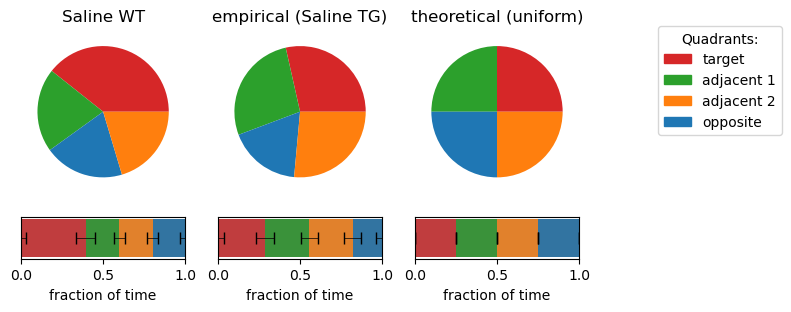

In [26]:
def plot_pie_strip(l_sel, fractions=fractions, stdeviations=stdeviations):
    unit_width = 2.4
    fig, ax = plt.subplots(2, len(l_sel), height_ratios=[4, 1], figsize=(unit_width * len(l_sel), unit_width * 1.25))
    Z = zip([fractions, stdeviations], [1/4, 0])
    uniform_fractions, uniform_stdeviations = [df.iloc[[0], :4].copy().map(lambda x: val) for df,val in Z]
    def plot_one(j, t):
        ii = np.array([0, 1, 3, 2])
        if t is None:
            frac, sdev = [df.iloc[0].loc['test condition'].to_numpy() for df in [uniform_fractions, uniform_stdeviations]]
        else:
            frac, sdev = [df.loc[t].loc['test condition'].to_numpy() for df in [fractions, stdeviations]]
        frac_pie = frac[ii]
        colors = ['C' + str(int(i)) for i in np.array(3 - ii)]
        ax_top, ax_bottom = [ax[i, j] for i in [0, 1]]
        ax_top.pie(frac_pie, colors=colors)
        ix = pd.MultiIndex.from_product([['test condition'], list(range(4))])
        #fracdf, sdevdf = [pd.DataFrame(a, columns=[t[1]], index=ix).transpose() for a in [frac, sdev]]
        fracdf = fractions.loc[[t]].copy() if t is not None else uniform_fractions.copy()
        fracdf.index = fracdf.index.get_level_values(1)
        sdevdf = stdeviations.loc[[t]].copy() if t is not None else uniform_stdeviations.copy()
        sdevdf.index = sdevdf.index.get_level_values(1)
        if t is None:
            pass
        ax_bottom = frac_plot(ax_bottom, fracdf, sdevdf)
        ax_bottom.set_title('')
        ax_bottom.set_ylabel('')
        ax_bottom.set_yticks([])
        return(None)
    for j, t in enumerate(l_sel):
        plot_one(j, t)
    legend = quadrant_legend(fig, bbox_x=1, bbox_y=0.5)
    return((fig, ax))

l_sel = [
    ('CO26990', 'Saline WT'),
    ('CO26990', 'Saline TG'),
    None,
]

fig, ax = plot_pie_strip(l_sel, fractions.xs('both sexes', level=1, axis=0), stdeviations.xs('both sexes', level=1, axis=0))
for axi, title in zip(ax[0, :], ['Saline WT', 'empirical (Saline TG)', 'theoretical (uniform)']):
    axi.set_title(title)

attila_utils.savefig(fig, 'pie-chart-wt-tg-uniform')

In [27]:
%connect_info

{
  "shell_port": 57138,
  "iopub_port": 57139,
  "stdin_port": 57140,
  "control_port": 57142,
  "hb_port": 57141,
  "ip": "127.0.0.1",
  "key": "af6d9132-1dafeabfe5f138cfb0a5ba4f",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "conda-base-py",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-06-26-mwm-test-probe-CO28154/2024-06-26-mwm-test-probe-CO28154.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-bcd5f6f1-cae9-4c86-8fc9-0f3ccfe21a90.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
